# clustering-crime-data  

Perform KMeans Clustering for the crime data and identify the number of clusters formed and draw inferences.

Data Description:  
Murder -- Murder rates in different places of United States  
Assault -- Assualt rate in different places of United States  
UrbanPop -- urban population in different places of United States  
Rape -- Rape rate in different places of United States   

In [2]:
!pip install jovian --upgrade --quiet

In [136]:
import jovian

### import necessary libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Loading and preparing data

**Create pandas dataframe from crime_data.csv**

In [125]:
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Check the dimension of the dataframe**

In [126]:
data.shape

(50, 5)

**Describe the data**

In [127]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Checking if there are any null values**

In [128]:
data.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

**dropping the categorical feature and copy the remaining data to another dataframe**

In [129]:
mydata = data.drop(['Unnamed: 0'], axis=1)
mydata.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [130]:
# # Normalize the data
# def normalize(i):
#     x = (i-i.min())/(i.max()-i.min())
#     return x

# mydata_norm = normalize(mydata)
# mydata_norm.head()

**Scaling Data**

In [131]:
scaler = MinMaxScaler()
norm_mydata = mydata.copy()
def minmaxscaler(x):
    for columnName, columnData in x.iteritems():
        x[columnName] = scaler.fit_transform(np.array(columnData).reshape(-1, 1))
    
minmaxscaler(norm_mydata)
norm_mydata.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Scree plot or Elbow curve to find K

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

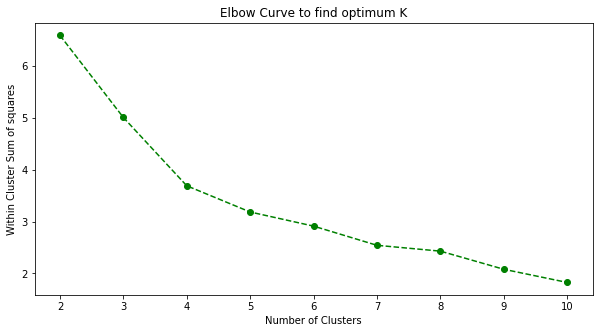

In [132]:
k = list(range(2,11))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(norm_mydata)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K') 

### Building KMeans Model and predicting

In [133]:
# Instantiating
kmeans4 = KMeans(n_clusters = 4)

# Training the model
kmeans4.fit(norm_mydata)

# predicting
y_pred = kmeans4.fit_predict(norm_mydata)
print(y_pred)

# Storing the y_pred values in a new column
data['Cluster'] = y_pred+1 #to start the cluster number from 1
data.head()

[2 0 0 2 0 0 3 3 0 2 3 1 0 3 1 3 1 2 1 0 3 0 1 2 3 1 1 0 1 3 0 0 2 1 3 3 3
 3 3 2 1 2 0 3 1 3 3 1 1 3]


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


**Storing the centroids to a dataframe**

In [135]:
centroids = kmeans4.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
centroids.index = np.arange(1, len(centroids)+1) # Start the index from 1
centroids

,Murder,Assault,UrbanPop,Rape
1,0.612450,0.750000,0.754237,0.679802
2,0.168675,0.114858,0.340287,0.126019
3,0.791416,0.680223,0.368644,0.364664
4,0.304394,0.329371,0.705882,0.310990


**Sample visualization of clusters**

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

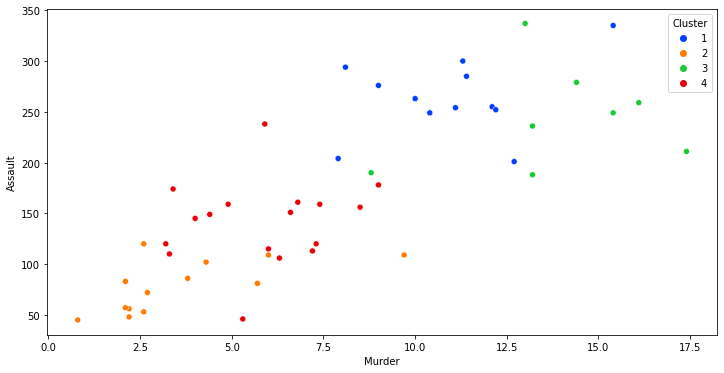

In [136]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=data['Murder'], y = data['Assault'], hue=data['Cluster'], palette='bright')

### Inferences

In [140]:
# count the number of states of each cluster
data['Cluster'].value_counts()

4    17
2    13
1    12
3     8
Name: Cluster, dtype: int64

In [141]:
# Finding the means of clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('Cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
1,11.0,264.0,76.5,33.6
2,3.6,78.5,52.1,12.2
3,13.9,243.6,53.8,21.4
4,5.9,141.2,73.6,19.3


Cluster 2 states has the least crime rate where as Cluster 1 states has the highest Assault, Rape rate.

In [142]:
# View cluster 2 data
data[data['Cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2


In [145]:
# Execute this to save new versions of the notebook
jovian.commit(project="clustering-crime-data")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "harikabonthu96/clustering-crime-data" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/harikabonthu96/clustering-crime-data


'https://jovian.ai/harikabonthu96/clustering-crime-data'